In [2]:
%%capture 
! pip install fastf1

In [3]:
import fastf1

#fastf1.Cache.enable_cache("f1_cache")

session = fastf1.get_session(2025, 'Spain', 'R')
#session.load(telemetry=True, laps=True, weather=True)


req         WARNING 	DEFAULT CACHE ENABLED! (252.25 MB) C:\Users\Akanksha\AppData\Local\Temp\fastf1


In [8]:
quali_2025 = fastf1.get_session(2025, 'Australia', 'Q')
quali_2025.load()
res = quali_2025.results
res


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,,1.0,,NaN,0 days 00:01:15.912000,0 days 00:01:15.415000,0 days 00:01:15.096000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,,2.0,,NaN,0 days 00:01:16.062000,0 days 00:01:15.468000,0 days 00:01:15.180000,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,3.0,,NaN,0 days 00:01:16.018000,0 days 00:01:15.565000,0 days 00:01:15.481000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,,4.0,,NaN,0 days 00:01:15.971000,0 days 00:01:15.798000,0 days 00:01:15.546000,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,Racing Bulls,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,,5.0,,NaN,0 days 00:01:16.225000,0 days 00:01:16.009000,0 days 00:01:15.670000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,,6.0,,NaN,0 days 00:01:16.245000,0 days 00:01:16.017000,0 days 00:01:15.737000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,,7.0,,NaN,0 days 00:01:16.029000,0 days 00:01:15.827000,0 days 00:01:15.755000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Ferrari,E80020,ferrari,Lewis,Hamilton,Lewis Hamilton,...,,8.0,,NaN,0 days 00:01:16.213000,0 days 00:01:15.919000,0 days 00:01:15.973000,NaT,,NaN
10,10,P GASLY,GAS,gasly,Alpine,0093CC,alpine,Pierre,Gasly,Pierre Gasly,...,,9.0,,NaN,0 days 00:01:16.328000,0 days 00:01:16.112000,0 days 00:01:15.980000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Williams,64C4FF,williams,Carlos,Sainz,Carlos Sainz,...,,10.0,,NaN,0 days 00:01:16.360000,0 days 00:01:15.931000,0 days 00:01:16.062000,NaT,,NaN


In [10]:
import fastf1
import os

# Ensure cache folder exists
os.makedirs("f1_cache", exist_ok=True)
fastf1.Cache.enable_cache("f1_cache")

# Load the 2025 Australian GP qualifying session
session = fastf1.get_session(2025, 'Australia', 'Q')
session.load()

# Get results table
results = session.results

# Extract driver, position, and best qualifying time
qualifying_summary = results[['BroadcastName', 'DriverNumber', 'Q1', 'Q2', 'Q3']].copy()

# Calculate best time across Q1/Q2/Q3
qualifying_summary['BestTime'] = results[['Q1', 'Q2', 'Q3']].min(axis=1)

# Display clean table
print(qualifying_summary[['BroadcastName', 'DriverNumber', 'BestTime']].sort_values('Position'))


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']


KeyError: 'Position'

In [8]:
verstappen = session.get_driver('VER')
print(verstappen)

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                 max_verstappen
TeamName                                                Red Bull Racing
TeamColor                                                        4781D7
TeamId                                                         red_bull
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                            
Position                                                            5.0
ClassifiedPosition                                              

In [10]:
session.load(telemetry = True)

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '44', '1', '6', '14', '31', '30', '23', '55', '22', '27', '63', '12', '5', '87', '10', '18', '43']


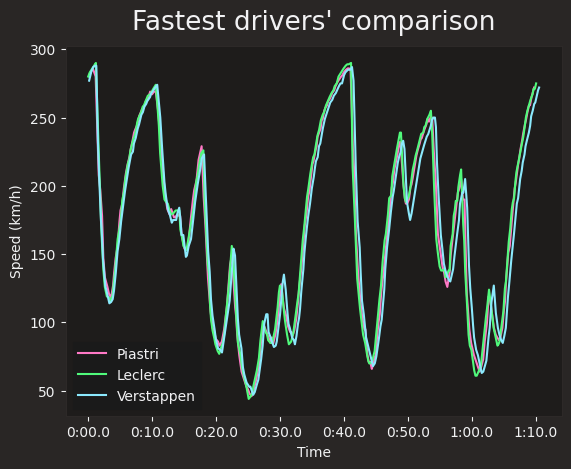

In [12]:
import fastf1.plotting
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods= False)
fast_piastri = session.laps.pick_drivers('PIA').pick_fastest()
fast_leclerc = session.laps.pick_drivers('LEC').pick_fastest()
fast_verstappen = session.laps.pick_drivers('VER').pick_fastest()

piastri_car_data = fast_piastri.get_car_data()
leclerc_car_data = fast_leclerc.get_car_data()
verstappen_car_data = fast_verstappen.get_car_data()

t2 = leclerc_car_data['Time']
t1 = piastri_car_data['Time']
t3 = verstappen_car_data['Time']

vcar1 = piastri_car_data['Speed']
vcar2 = leclerc_car_data['Speed']
vcar3 = verstappen_car_data['Speed']

fig, ax = plt.subplots()
ax.plot(t1, vcar1, label='Piastri')
ax.plot(t2, vcar2, label='Leclerc')
ax.plot(t3, vcar3, label='Verstappen')
ax.set_xlabel('Time')
ax.set_ylabel('Speed (km/h)')
ax.set_title("Fastest drivers' comparison")
ax.legend()
plt.show()

In [6]:
! pip install meteostat
from datetime import datetime
from meteostat import Point, Hourly

location = Point(-37.81, 144.96)  # Melbourne
start = datetime(2025, 3, 16, 15)  # Quali or Race day
end = datetime(2025, 3, 16, 18)

data = Hourly(location, start, end)
data = data.fetch()
print(data[['temp', 'prcp', 'rhum']])  # temp, precipitation, relative humidity


                     temp  prcp  rhum
time                                 
2025-03-16 15:00:00  10.6  <NA>  73.0
2025-03-16 16:00:00  10.2  <NA>  77.0
2025-03-16 17:00:00  10.5  <NA>  87.0
2025-03-16 18:00:00  10.0  <NA>  77.0


In [1]:
import fastf1
import os
import requests
from dotenv import load_dotenv
import numpy as np
import pandas as pd

In [2]:
quali_2024 = fastf1.get_session(2024, 'Australia', 'Q')
race_2024 = fastf1.get_session(2024, 'Australia', 'R')
try:
    sprint_2024 = fastf1.get_session(2024, 'Australia', 'S')
except Exception as e:
    sprint_2024 = None

sessions = [s for s in [quali_2024, race_2024, sprint_2024] if s is not None]
[session.load() for session in sessions]

req         WARNING 	DEFAULT CACHE ENABLED! (326.28 MB) C:\Users\Akanksha\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api  

[None, None]

In [9]:
quali_2024.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:56.176000,VER,1,0 days 00:01:40.765000,1.0,1.0,0 days 00:16:20.464000,NaT,0 days 00:00:46.124000,0 days 00:00:19.167000,...,True,Red Bull Racing,0 days 00:16:20.464000,2024-03-23 05:01:21.852,1,NaN,False,,False,False
1,0 days 00:19:13.654000,VER,1,0 days 00:01:17.478000,2.0,1.0,NaT,NaT,0 days 00:00:26.827000,0 days 00:00:17.500000,...,True,Red Bull Racing,0 days 00:17:56.176000,2024-03-23 05:02:57.564,1,NaN,False,,False,True
2,0 days 00:21:48.125000,VER,1,NaT,3.0,1.0,NaT,0 days 00:20:59.534000,0 days 00:00:37.806000,0 days 00:00:26.028000,...,True,Red Bull Racing,0 days 00:19:13.654000,2024-03-23 05:04:15.042,1,NaN,False,,False,False
3,0 days 00:23:28.134000,VER,1,0 days 00:01:40.009000,4.0,2.0,0 days 00:21:50.135000,NaT,0 days 00:00:38.811000,0 days 00:00:23.459000,...,False,Red Bull Racing,0 days 00:21:48.125000,2024-03-23 05:06:49.513,1,NaN,False,,False,False
4,0 days 00:24:45.363000,VER,1,0 days 00:01:17.229000,5.0,2.0,NaT,NaT,0 days 00:00:26.591000,0 days 00:00:17.522000,...,False,Red Bull Racing,0 days 00:23:28.134000,2024-03-23 05:08:29.522,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0 days 00:24:09.375000,ZHO,24,0 days 00:01:18.188000,5.0,1.0,NaT,NaT,0 days 00:00:26.991000,0 days 00:00:17.944000,...,True,Kick Sauber,0 days 00:22:51.187000,2024-03-23 05:07:52.575,1,NaN,False,,False,True
306,0 days 00:29:48.193000,ZHO,24,NaT,6.0,1.0,NaT,0 days 00:25:47.213000,0 days 00:00:34.337000,0 days 00:00:24.738000,...,True,Kick Sauber,0 days 00:24:09.375000,2024-03-23 05:09:10.763,1,NaN,False,,False,False
307,0 days 00:31:42.067000,ZHO,24,0 days 00:01:53.874000,7.0,2.0,0 days 00:29:58.954000,NaT,0 days 00:00:50.888000,0 days 00:00:18.747000,...,True,Kick Sauber,0 days 00:29:48.193000,2024-03-23 05:14:49.581,1,NaN,False,,False,False
308,0 days 00:33:00.502000,ZHO,24,0 days 00:01:18.435000,8.0,2.0,NaT,NaT,0 days 00:00:26.788000,0 days 00:00:17.706000,...,True,Kick Sauber,0 days 00:31:42.067000,2024-03-23 05:16:43.455,1,NaN,False,,False,True


In [10]:
race_2024.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:59:56.944000,VER,1,0 days 00:01:27.458000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:18.462000,...,True,Red Bull Racing,0 days 00:58:29.232000,NaT,1,1.0,False,,False,False
1,0 days 01:01:21.043000,VER,1,0 days 00:01:24.099000,2.0,1.0,NaT,NaT,0 days 00:00:29.623000,0 days 00:00:18.375000,...,True,Red Bull Racing,0 days 00:59:56.944000,NaT,1,2.0,False,,False,True
2,0 days 01:02:44.158000,VER,1,0 days 00:01:23.115000,3.0,1.0,NaT,NaT,0 days 00:00:28.793000,0 days 00:00:18.573000,...,True,Red Bull Racing,0 days 01:01:21.043000,NaT,1,2.0,False,,False,True
3,0 days 01:04:24.523000,VER,1,NaT,4.0,1.0,NaT,0 days 01:04:24.613000,0 days 00:00:28.756000,0 days 00:00:18.353000,...,True,Red Bull Racing,0 days 01:02:44.158000,NaT,1,19.0,False,,False,False
4,0 days 01:00:06.790000,GAS,10,0 days 00:01:37.304000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:18.854000,...,True,Alpine,0 days 00:58:29.232000,NaT,1,17.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0 days 02:13:21.370000,PIA,81,0 days 00:01:20.199000,54.0,3.0,NaT,NaT,0 days 00:00:27.903000,0 days 00:00:17.756000,...,False,McLaren,0 days 02:12:01.171000,NaT,1,4.0,False,,False,True
994,0 days 02:14:42.124000,PIA,81,0 days 00:01:20.754000,55.0,3.0,NaT,NaT,0 days 00:00:28.154000,0 days 00:00:17.949000,...,False,McLaren,0 days 02:13:21.370000,NaT,1,4.0,False,,False,True
995,0 days 02:16:02.481000,PIA,81,0 days 00:01:20.357000,56.0,3.0,NaT,NaT,0 days 00:00:27.947000,0 days 00:00:17.927000,...,False,McLaren,0 days 02:14:42.124000,NaT,1,4.0,False,,False,True
996,0 days 02:17:27.736000,PIA,81,0 days 00:01:25.255000,57.0,3.0,NaT,NaT,0 days 00:00:28.222000,0 days 00:00:18.192000,...,False,McLaren,0 days 02:16:02.481000,NaT,126,4.0,False,,False,False


In [17]:
info1 = quali_2024.laps[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].copy()
info1.head()

,Driver,LapTime,Sector1Time,Sector2Time,Sector3Time
0,VER,0 days 00:01:40.765000,0 days 00:00:46.124000,0 days 00:00:19.167000,0 days 00:00:35.474000
1,VER,0 days 00:01:17.478000,0 days 00:00:26.827000,0 days 00:00:17.500000,0 days 00:00:33.151000
2,VER,NaT,0 days 00:00:37.806000,0 days 00:00:26.028000,0 days 00:01:30.652000
3,VER,0 days 00:01:40.009000,0 days 00:00:38.811000,0 days 00:00:23.459000,0 days 00:00:37.739000
4,VER,0 days 00:01:17.229000,0 days 00:00:26.591000,0 days 00:00:17.522000,0 days 00:00:33.116000


In [18]:
race_2024.laps[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].copy()

,Driver,LapTime,Sector1Time,Sector2Time,Sector3Time
0,VER,0 days 00:01:27.458000,NaT,0 days 00:00:18.462000,0 days 00:00:35.518000
1,VER,0 days 00:01:24.099000,0 days 00:00:29.623000,0 days 00:00:18.375000,0 days 00:00:36.101000
2,VER,0 days 00:01:23.115000,0 days 00:00:28.793000,0 days 00:00:18.573000,0 days 00:00:35.749000
3,VER,NaT,0 days 00:00:28.756000,0 days 00:00:18.353000,NaT
4,GAS,0 days 00:01:37.304000,NaT,0 days 00:00:18.854000,0 days 00:00:38.564000
...,...,...,...,...,...
993,PIA,0 days 00:01:20.199000,0 days 00:00:27.903000,0 days 00:00:17.756000,0 days 00:00:34.540000
994,PIA,0 days 00:01:20.754000,0 days 00:00:28.154000,0 days 00:00:17.949000,0 days 00:00:34.651000
995,PIA,0 days 00:01:20.357000,0 days 00:00:27.947000,0 days 00:00:17.927000,0 days 00:00:34.483000
996,PIA,0 days 00:01:25.255000,0 days 00:00:28.222000,0 days 00:00:18.192000,0 days 00:00:38.841000


In [21]:
for col in ["LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]:
    info1[f"{col} (s)"] = info1[col].dt.total_seconds()
info1.head()

,Driver,LapTime,Sector1Time,Sector2Time,Sector3Time,LapTime (s),Sector1Time (s),Sector2Time (s),Sector3Time (s)
0,VER,0 days 00:01:40.765000,0 days 00:00:46.124000,0 days 00:00:19.167000,0 days 00:00:35.474000,100.765,46.124,19.167,35.474
1,VER,0 days 00:01:17.478000,0 days 00:00:26.827000,0 days 00:00:17.500000,0 days 00:00:33.151000,77.478,26.827,17.500,33.151
2,VER,NaT,0 days 00:00:37.806000,0 days 00:00:26.028000,0 days 00:01:30.652000,NaN,37.806,26.028,90.652
3,VER,0 days 00:01:40.009000,0 days 00:00:38.811000,0 days 00:00:23.459000,0 days 00:00:37.739000,100.009,38.811,23.459,37.739
4,VER,0 days 00:01:17.229000,0 days 00:00:26.591000,0 days 00:00:17.522000,0 days 00:00:33.116000,77.229,26.591,17.522,33.116


In [ ]:
info3 = race_2024.laps[['Driver', 'Sector1Time']]
info3.dropna(inplace=True)
info3.head(10)

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_17424\1851655856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info3.dropna(inplace=True)


,Sector1Time
1,0 days 00:00:29.623000
2,0 days 00:00:28.793000
3,0 days 00:00:28.756000
5,0 days 00:00:29.905000
6,0 days 00:00:29.379000
7,0 days 00:00:29.050000
8,0 days 00:00:29.693000
9,0 days 00:00:29.368000
10,0 days 00:00:29.068000
11,0 days 00:00:29.380000


In [ ]:
info2 = race_2024.laps[['Driver', 'Sector1Time']]
info2['Sector1Time'].dt.total_seconds().head(10)


0       NaN
1    29.623
2    28.793
3    28.756
4       NaN
5    29.905
6    29.379
7    29.050
8    29.693
9    29.368
Name: Sector1Time, dtype: float64

In [32]:
info3['Sector1Time'].dt.total_seconds().head(10)


1     29.623
2     28.793
3     28.756
5     29.905
6     29.379
7     29.050
8     29.693
9     29.368
10    29.068
11    29.380
Name: Sector1Time, dtype: float64

In [35]:
laps_2024 = pd.concat([s.laps[['Driver', 'LapTime']].copy() for s in sessions], ignore_index=True)
laps_2024.shape

(1308, 2)

In [39]:
for s in sessions:
    print(s.laps.shape)

(310, 31)
(998, 31)


In [40]:
998+310

1308

In [41]:
fastf1.core.Laps

fastf1.core.Laps

In [43]:
for s in sessions:
    print(s.session_info['Name'][0])

Q
R


In [44]:
quali_2024 = fastf1.get_session(2024, 'Australia', 'Q')
race_2024 = fastf1.get_session(2024, 'Australia', 'R')
try:
    sprint_2024 = fastf1.get_session(2024, 'Australia', 'S')
except Exception as e:
    sprint_2024 = None

sessions = [s for s in [quali_2024, race_2024, sprint_2024] if s is not None]
[session.load() for session in sessions]

# Extract relevant information and remove invalid entries
# Step 1: Extract Clean SectorTimes and average them per session to choose the BestTime

def extract_sector_data(session, session_label):
    df = session.laps[["Driver", "Sector1Time", "Sector2Time", "Sector3Time"]].dropna()
    df["Sector1Time"] = df["Sector1Time"].dt.total_seconds()
    df["Sector2Time"] = df["Sector2Time"].dt.total_seconds()
    df["Sector3Time"] = df["Sector3Time"].dt.total_seconds()
    return df.groupby("Driver").mean().add_prefix(f"{session_label}_")

quali_sector_avg = extract_sector_data(quali_2024, "Quali")
race_sector_avg = extract_sector_data(race_2024, "Race")
sprint_sector_avg = extract_sector_data(sprint_2024, "Sprint") if sprint_2024 else pd.DataFrame()

sector_avg_all = quali_sector_avg.join(race_sector_avg, how='outer')
if not sprint_sector_avg.empty:
    sector_avg_all = sector_avg_all.join(sprint_sector_avg, how="outer")

def compute_best_sectors(row):
    return pd.Series({
        "Best_Sector1": min([v for k, v in row.items() if "Sector1Time" in k and pd.notna(v)]),
        "Best_Sector2": min([v for k, v in row.items() if "Sector2Time" in k and pd.notna(v)]),
        "Best_Sector3": min([v for k, v in row.items() if "Sector3Time" in k and pd.notna(v)])
    })

best_sectors = sector_avg_all.apply(compute_best_sectors, axis=1)

def extract_positions(session, label):
    df = session.results[["Abbreviation", "Position"]].copy()
    df.set_index("Abbreviation", inplace=True)
    df.columns = [f"{label}_Position"]
    return df

positions = [
    extract_positions(quali_2024, "Qualifying"),
    extract_positions(race_2024, "Race")
]
if sprint_2024:
    positions.append(extract_positions(sprint_2024, "Sprint"))

position_data = pd.concat(positions, axis=1)


final_df = pd.concat([sector_avg_all, best_sectors], axis=1).join(position_data, how="inner")
final_df.reset_index(inplace=True)
final_df.rename(columns={"index": "Driver"}, inplace=True)

print(final_df.head)

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached d

<bound method NDFrame.head of    Driver  Quali_Sector1Time  Quali_Sector2Time  Quali_Sector3Time  \
0     ALB          35.652500          19.255900          36.143100   
1     ALO          35.403312          18.589625          37.471688   
2     BOT          34.484455          19.398000          38.841364   
3     GAS          32.881625          18.883500          38.516250   
4     HAM          36.341333          20.414250          37.361417   
5     HUL          30.789200          18.902800          36.255000   
6     LEC          40.597200          19.516400          39.814933   
7     MAG          34.792556          19.160444          37.461778   
8     NOR          35.214385          18.634846          38.762000   
9     OCO          33.355000          19.945000          41.313647   
10    PER          37.639765          19.627706          41.305706   
11    PIA          37.365417          18.905917          38.775167   
12    RIC          38.046000          18.600750          37.

In [45]:
final_df.shape

(19, 12)

In [47]:
final_df.head(20)

,Driver,Quali_Sector1Time,Quali_Sector2Time,Quali_Sector3Time,Race_Sector1Time,Race_Sector2Time,Race_Sector3Time,Best_Sector1,Best_Sector2,Best_Sector3,Qualifying_Position,Race_Position
0,ALB,35.652500,19.255900,36.143100,29.373893,18.522982,36.676339,29.373893,18.522982,36.143100,12.0,11.0
1,ALO,35.403312,18.589625,37.471688,29.153140,18.555982,36.735298,29.153140,18.555982,36.735298,10.0,8.0
2,BOT,34.484455,19.398000,38.841364,29.563875,18.826607,36.866768,29.563875,18.826607,36.866768,13.0,14.0
3,GAS,32.881625,18.883500,38.516250,29.606286,18.629214,36.862571,29.606286,18.629214,36.862571,17.0,13.0
4,HAM,36.341333,20.414250,37.361417,29.553357,18.145857,36.924929,29.553357,18.145857,36.924929,11.0,18.0
5,HUL,30.789200,18.902800,36.255000,29.372895,18.810175,36.632298,29.372895,18.810175,36.255000,16.0,9.0
6,LEC,40.597200,19.516400,39.814933,28.882860,18.224632,36.027404,28.882860,18.224632,36.027404,5.0,2.0
7,MAG,34.792556,19.160444,37.461778,29.324036,18.430304,36.807393,29.324036,18.430304,36.807393,14.0,10.0
8,NOR,35.214385,18.634846,38.762000,28.914263,18.278035,36.017579,28.914263,18.278035,36.017579,4.0,3.0
9,OCO,33.355000,19.945000,41.313647,29.603321,18.689143,37.145732,29.603321,18.689143,37.145732,15.0,16.0


In [1]:
import fastf1
import os
import requests
from fastf1.core import Laps
from dotenv import load_dotenv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

os.makedirs("f1_cache", exist_ok=True)
fastf1.Cache.enable_cache("f1_cache")

# Loading Australian GP 2024 sessions
quali_2024 = fastf1.get_session(2024, 'Australia', 'Q')
race_2024 = fastf1.get_session(2024, 'Australia', 'R')
try:
    sprint_2024 = fastf1.get_session(2024, 'Australia', 'S')
except Exception as e:
    sprint_2024 = None

sessions = [s for s in [quali_2024, race_2024, sprint_2024] if s is not None]
[session.load() for session in sessions]

# Extract relevant information and remove invalid entries
# Step 1: Extract Clean SectorTimes and average them per session to choose the BestTime

def extract_sector_data(session, session_label):
    df = session.laps[["Driver", 'LapTime', "Sector1Time", "Sector2Time", "Sector3Time"]].dropna()
    df["LapTime"] = df["LapTime"].dt.total_seconds()
    df["Sector1Time"] = df["Sector1Time"].dt.total_seconds()
    df["Sector2Time"] = df["Sector2Time"].dt.total_seconds()
    df["Sector3Time"] = df["Sector3Time"].dt.total_seconds()
    return df.groupby("Driver").mean().add_prefix(f"{session_label}_")

quali_sector_avg = extract_sector_data(quali_2024, "Quali")
race_sector_avg = extract_sector_data(race_2024, "Race")
sprint_sector_avg = extract_sector_data(sprint_2024, "Sprint") if sprint_2024 else pd.DataFrame()

sector_avg_all = quali_sector_avg.join(race_sector_avg, how='outer')
if not sprint_sector_avg.empty:
    sector_avg_all = sector_avg_all.join(sprint_sector_avg, how="outer")

def compute_best_sectors(row):
    return pd.Series({
        "Best_Sector1": min([v for k, v in row.items() if "Sector1Time" in k and pd.notna(v)]),
        "Best_Sector2": min([v for k, v in row.items() if "Sector2Time" in k and pd.notna(v)]),
        "Best_Sector3": min([v for k, v in row.items() if "Sector3Time" in k and pd.notna(v)])
    })

best_sectors = sector_avg_all.apply(compute_best_sectors, axis=1)

def extract_positions(session, label):
    df = session.results[["Abbreviation", "Position"]].copy()
    df.set_index("Abbreviation", inplace=True)
    df.columns = [f"{label}_Position"]
    return df

positions = [
    extract_positions(quali_2024, "Qualifying"),
    extract_positions(race_2024, "Race")
]
if sprint_2024:
    positions.append(extract_positions(sprint_2024, "Sprint"))

position_data = pd.concat(positions, axis=1)


final_df = pd.concat([sector_avg_all, best_sectors], axis=1).join(position_data, how="inner")
final_df.reset_index(inplace=True)
final_df.rename(columns={"index": "Driver"}, inplace=True)

# OpenWeatherMap api call
# Weather data for Australia -- rainfall is probable this year, during the race
'''load_dotenv()
API_KEY = os.getenv("API_KEY")
weather_url = f"https://history.openweathermap.org/data/2.5/history/city?lat=-37.81&lon=144.96&type=hour&appid={API_KEY}"
response = requests.get(weather_url)
weather_data = response.json()
forecast_time = "2025-03-16 15:00:00"
forecast_data = next((f for f in weather_data["list"] if f["dt_txt"] == forecast_time), None)
rain_probability = forecast_data["pop"] if forecast_data else 0
'''
# Add wet performance factor
driver_wet_performance = {
    "VER": 0.975196, 
    "HAM": 0.976464,  
    "LEC": 0.975862,  
    "NOR": 0.978179,  
    "ALO": 0.972655,  
    "RUS": 0.968678,  
    "SAI": 0.978754,  
    "TSU": 0.996338,  
    "OCO": 0.981810,  
    "GAS": 0.978832,  
    "STR": 0.979857   
}

# Qualifying Results 2025
quali_2025 = fastf1.get_session(2025, 'Australia', 'Q')
quali_2025.load()
quali_results = quali_2025.results
qualifying_data = quali_results[['Abbreviation', 'DriverNumber', 'Q1', 'Q2', 'Q3']].copy()
qualifying_data['Best Time'] = quali_results[['Q1', 'Q2', 'Q3']].min(axis=1)

qualifying_data["QualifyingTime (s)"] = qualifying_data["Best Time"].dt.total_seconds()
#qualifying_data["WetPerformanceFactor"] = qualifying_data["Abbreviation"].map(driver_wet_performance)


'''if rain_probability >= 0.75:
    qualifying_data["QualifyingTime"] = qualifying_data["QualifyingTime (s)"] * qualifying_data["WetPerformanceFactor"]
else:
    qualifying_data["QualifyingTime"] = qualifying_data["QualifyingTime (s)"]
    '''
# Merged Data
merged_data = pd.merge(
    qualifying_data,
    final_df,
    left_on='Abbreviation',
    right_on='Driver',
    how='inner'
)

merged_data.head()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached d

,Abbreviation,DriverNumber,Q1,Q2,Q3,Best Time,QualifyingTime (s),Driver,Quali_LapTime,Quali_Sector1Time,...,Quali_Sector3Time,Race_LapTime,Race_Sector1Time,Race_Sector2Time,Race_Sector3Time,Best_Sector1,Best_Sector2,Best_Sector3,Qualifying_Position,Race_Position
0,NOR,4,0 days 00:01:15.912000,0 days 00:01:15.415000,0 days 00:01:15.096000,0 days 00:01:15.096000,75.096,NOR,92.611231,35.214385,...,38.762000,83.209877,28.914263,18.278035,36.017579,28.914263,18.278035,36.017579,4.0,3.0
1,PIA,81,0 days 00:01:16.062000,0 days 00:01:15.468000,0 days 00:01:15.180000,0 days 00:01:15.180000,75.180,PIA,95.046500,37.365417,...,38.775167,83.711877,29.249702,18.264842,36.197333,29.249702,18.264842,36.197333,6.0,4.0
2,VER,1,0 days 00:01:16.018000,0 days 00:01:15.565000,0 days 00:01:15.481000,0 days 00:01:15.481000,75.481,VER,95.011000,36.727688,...,38.030062,83.607000,29.208000,18.474000,35.925000,29.208000,18.474000,35.925000,1.0,19.0
3,RUS,63,0 days 00:01:15.971000,0 days 00:01:15.798000,0 days 00:01:15.546000,0 days 00:01:15.546000,75.546,RUS,96.648556,35.996778,...,40.756722,83.505891,28.849891,18.260964,36.395036,28.849891,18.260964,36.395036,7.0,17.0
4,TSU,22,0 days 00:01:16.225000,0 days 00:01:16.009000,0 days 00:01:15.670000,0 days 00:01:15.670000,75.670,TSU,96.027000,39.829250,...,37.286833,84.721737,29.237351,18.873316,36.611070,29.237351,18.873316,36.611070,8.0,7.0


In [5]:
import pandas as pd
temp = pd.Series(
    data = [31, 33, 34, 35, 35, None, 32],
    index = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'],
    name = 'temperatures'
)

temp.dtype

dtype('float64')

In [10]:
temp.mean(), temp.index

(33.333333333333336,
 Index(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], dtype='object'))

In [11]:
temp[temp > temp.mean()]

WED    34.0
THU    35.0
FRI    35.0
Name: temperatures, dtype: float64

In [12]:
temp > temp.mean()

MON    False
TUE    False
WED     True
THU     True
FRI     True
SAT    False
SUN    False
Name: temperatures, dtype: bool

In [22]:
color = pd.Series(['red', 'green', 'yellow', 'blue'])
size_type = pd.api.types.CategoricalDtype(
    categories = ['blue', 'green', 'red', 'yellow'],
    ordered = True
)

new_color = color.astype(size_type)
new_color

0       red
1     green
2    yellow
3      blue
dtype: category
Categories (4, object): ['blue' < 'green' < 'red' < 'yellow']

In [23]:
color = pd.Series(['red', 'green', 'yellow', 'blue'],
                  dtype = 'category')
new_col = color.cat.reorder_categories(
    ['blue', 'green', 'red', 'yellow'],
    ordered = True
)
new_col

0       red
1     green
2    yellow
3      blue
dtype: category
Categories (4, object): ['blue' < 'green' < 'red' < 'yellow']